(sec:pandas10min_2)=
# 판다스 10분 완성 2부


**필수 라이브러리**

In [1]:
import numpy as np
import pandas as pd

## 데이터 결합: merge-join-concat

- 참고: [Merging section](https://pandas.pydata.org/docs/user_guide/merging.html#merging)

### 이어붙이기: `pd.concat()` 함수

`pd.concat()` 함수는 여러 개의 데이터프레임을 하나로 합친다.

- `axis=0`: 종으로 합치기

In [6]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [7]:
df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)

df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [8]:
df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11],
)

df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [16]:
pd.concat([df1, df2, df3]) # axis=0 이 기본값

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


- `axis=1`: 횡으로 합치기

In [14]:
df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)

df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [15]:
pd.concat([df1, df4], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [20]:
df1.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [19]:
pd.concat([df1, df4], axis=1).reindex(df1.index)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [17]:
df4.reindex(df1.index)

,B,D,F
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,B2,D2,F2
3,B3,D3,F3


In [21]:
pd.concat([df1, df4.reindex(df1.index)], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


### 합병: `pd.merge()` 함수

`pd.merge()` 함수 는 SQL 방식으로 특정 열을 기준으로 두 개의 데이터프레임을 합친다.
다양한 옵션을 지원하는 매우 강력한 도구이다.

- 참고: [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join)

**예제**

실습을 위해 아래 두 데이터프레임을 이용한다.

In [5]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [6]:
left

,key,lval
0,foo,1
1,foo,2


In [7]:
right

,key,rval
0,foo,4
1,foo,5


- `on="key"` 키워드 인자
    - `key` 열에 사용된 항목 각각에 대해 다른 열에서 해당 항목과 연관된 값들을 조합할 수 있는 모든 경우의 수를 다룬다.
    - `foo` 값에 대해 `lval` 열에서 2개의 값이,
        `rval` 열에서 2개의 값이 있기에 `foo`와 관련해서 총 4개의 경우가 생성된다.
        
    | `key` | `left.lval` | `right.rval` | 경우의 수 |
    | :---: | :---: | :---: | :---: |
    | `foo` | `1, 2` | `4, 5` | 4 |

In [8]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


**예제**

In [9]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [10]:
left

,key,lval
0,foo,1
1,bar,2


In [11]:
right

,key,rval
0,foo,4
1,bar,5


- `on="key"` 키워드 인자
    - `key` 열에 사용된 항목별로 모든 경우의 수를 다룬다.
    - `foo` 값에 대해 `lval` 열에서 1개의 값이,
        `rval` 열에서 1개의 값이 있기에 `foo`와 관련해서 총 1개의 경우가 생성된다.
    - `bar` 값에 대해 `lval` 열에서 1개의 값이,
        `rval` 열에서 1개의 값이 있기에 `foo`와 관련해서 총 1개의 경우가 생성된다.
        
    | `key` | `left.lval` | `right.rval` | 경우의 수 |
    | :---: | :---: | :---: | :---: |
    | `foo` | `1` | `4` | 1 |        
    | `bar` | `2` | `5` | 1 |        

In [12]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


**예제**

경우의 수는 지정된 열의 항목이 사용된 횟수를 기준으로 한다. 

In [13]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

In [14]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [15]:
right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [16]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


| `key` | (`left.A`, `left.B`) | (`right.C`, `right.D`) | 경우의 수 |
| :---: | :---: | :---: | :---: |
| `K0` | (`A0`, `B0`) | (`C0`, `D0`) | 1 |
| `K1` | (`A1`, `B1`) | (`C1`, `D1`) | 1 |
| `K2` | (`A2`, `B2`) | (`C2`, `D2`) | 1 |
| `K3` | (`A3`, `B3`) | (`C3`, `D3`) | 1 |

In [17]:
result = pd.merge(left, right, on="key")
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


**다양한 키워드 인자**

In [18]:
left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [19]:
right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


- `how='inner'`: 지정된 키의 교집합 대상

In [20]:
result = pd.merge(left, right, on=["key1", "key2"]) # how='inner' 가 기본값
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [21]:
result = pd.merge(left, right, how="inner", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


- `how='outer'`: 지정된 키의 합집합 대상

In [22]:
result = pd.merge(left, right, how="outer", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


- `how='left'`: 왼쪽 데이터프레임의 키에 포함된 항목만 대상

In [23]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [24]:
result = pd.merge(left, right, how="left", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


- `how='right'`: 오른쪽 데이터프레임의 키에 포함된 항목만 대상

In [25]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [26]:
result = pd.merge(left, right, how="right", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


- `how='cross'`: 모든 경우의 수 조합

In [27]:
result = pd.merge(left, right, how="cross")
result

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K1,K0,C2,D2
3,K0,K0,A0,B0,K2,K0,C3,D3
4,K0,K1,A1,B1,K0,K0,C0,D0
5,K0,K1,A1,B1,K1,K0,C1,D1
6,K0,K1,A1,B1,K1,K0,C2,D2
7,K0,K1,A1,B1,K2,K0,C3,D3
8,K1,K0,A2,B2,K0,K0,C0,D0
9,K1,K0,A2,B2,K1,K0,C1,D1


### 합병: `DataFrame.join()` 메서드

인덱스를 기준으로 두 개의 데이터프레임을 합병할 때 사용한다.

In [38]:
left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
)

left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [39]:
right = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
)

right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [24]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


아래와 같이 `pd.merge()` 함수를 이용한 결과와 동일하다.

In [37]:
pd.merge(left, right, left_index=True, right_index=True, how='left')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


`pd.merge()` 함수의 키워드 인자를 동일하게 사용할 수 있다.

- `how='outer'`

In [41]:
left.join(right, how="outer")

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


아래 코드가 동일한 결과를 낸다.

In [43]:
pd.merge(left, right, left_index=True, right_index=True, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


- `how='inner'`

In [44]:
left.join(right, how="inner")

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


아래 코드가 동일한 결과를 낸다.

In [45]:
pd.merge(left, right, left_index=True, right_index=True, how='inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


## 그룹화: `pd.groupby()` 함수

- 참고: [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby)

`pd.groupby()` 함수는 다음 3 기능을 제공한다.

- **분류**<font size='2'>Splitting</font>: 데이터를 조건에 따라 여러 그룹으로 분류
- **함수 적용**<font size='2'>Applying</font>: 그룹별로 함수 적용
- **조합**<font size='2'>Combining</font>: 그룹별 함수 적용 결과를 취합하여 새로운 데이터프레임/시리즈 생성

In [46]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

df

,A,B,C,D
0,foo,one,-1.166278,-0.738462
1,bar,one,0.077269,-0.329479
2,foo,two,-0.059147,-0.332760
3,bar,three,-0.704183,0.712658
4,foo,two,-0.073500,-0.585662
5,bar,two,-2.868222,-0.206577
6,foo,one,-1.124368,0.490536
7,bar,three,-0.037941,-2.142317


- `A` 열에 사용된 항목 기준으로 그룹으로 분류한 후 그룹별로 `C`와 `D` 열의 모든 항목의 합 계산해서 새로운 데이터프레임 생성

| `A`(사용횟수) | 경우의 수 |
| :---: | :---: |
| `bar`(4) | 1 |
| `foo`(4) | 1 |

In [47]:
df.groupby('A')[["C", "D"]].sum()

,C,D
A,,
bar,-3.533077,-1.965715
foo,-2.423293,-1.166349


- `A`열의 항목과 `B` 열의 항목의 조합을 기준으로 그룹으로 그룹별로 `C`와 `D` 열의 모든 항목의 합 계산해서 새로운 데이터프레임 생성

| `A`(사용횟수) | `B`(사용횟수) | 경우의 수 |
| :---: | :---: | :---: |
| `bar`(4) | `one`(1), `three`(2), `two`(1) | 3 |
| `foo`(4) | `one`(2), `two`(2) | 2 |

In [48]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.077269 -0.329479
    three -0.742124 -1.429659
    two   -2.868222 -0.206577
foo one   -2.290646 -0.247926
    two   -0.132647 -0.918423

**그룹 확인**

- `for` 반복문 활용 

In [49]:
for name, group in df.groupby(["A", "B"]):
    print(name)
    print(group)

('bar', 'one')
     A    B         C         D
1  bar  one  0.077269 -0.329479
('bar', 'three')
     A      B         C         D
3  bar  three -0.704183  0.712658
7  bar  three -0.037941 -2.142317
('bar', 'two')
     A    B         C         D
5  bar  two -2.868222 -0.206577
('foo', 'one')
     A    B         C         D
0  foo  one -1.166278 -0.738462
6  foo  one -1.124368  0.490536
('foo', 'two')
     A    B         C         D
2  foo  two -0.059147 -0.332760
4  foo  two -0.073500 -0.585662


- `get_group()` 메서드

In [50]:
df.groupby(["A", "B"]).get_group(('bar', 'one'))

,A,B,C,D
1,bar,one,0.077269,-0.329479


In [51]:
df.groupby(["A", "B"]).get_group(('bar', 'three'))

,A,B,C,D
3,bar,three,-0.704183,0.712658
7,bar,three,-0.037941,-2.142317


- `groups` 속성

In [52]:
df.groupby(["A", "B"]).groups

{('bar', 'one'): [1], ('bar', 'three'): [3, 7], ('bar', 'two'): [5], ('foo', 'one'): [0, 6], ('foo', 'two'): [2, 4]}

- `value_counts` 속성

In [53]:
df.groupby(["A", "B"]).value_counts()

A    B      C          D        
bar  one     0.077269  -0.329479    1
     three  -0.704183   0.712658    1
            -0.037941  -2.142317    1
     two    -2.868222  -0.206577    1
foo  one    -1.166278  -0.738462    1
            -1.124368   0.490536    1
     two    -0.073500  -0.585662    1
            -0.059147  -0.332760    1
dtype: int64

- `nunique` 속성

In [54]:
df.groupby(["A", "B"]).nunique()

C  D
A   B          
bar one    1  1
    three  2  2
    two    1  1
foo one    2  2
    two    2  2

- `sort=True` 키워드 인자

In [55]:
df.groupby(["A", "B"], sort=True).sum()

C         D
A   B                        
bar one    0.077269 -0.329479
    three -0.742124 -1.429659
    two   -2.868222 -0.206577
foo one   -2.290646 -0.247926
    two   -0.132647 -0.918423

In [56]:
df.groupby(["A", "B"], sort=False).sum()

C         D
A   B                        
foo one   -2.290646 -0.247926
bar one    0.077269 -0.329479
foo two   -0.132647 -0.918423
bar three -0.742124 -1.429659
    two   -2.868222 -0.206577

In [57]:
df.groupby(["A", "B"], sort=False).nunique()

C  D
A   B          
foo one    2  2
bar one    1  1
foo two    2  2
bar three  2  2
    two    1  1

**그룹 연산**

In [58]:
df.groupby('A')[["C", "D"]].max()

,C,D
A,,
bar,0.077269,0.712658
foo,-0.059147,0.490536


In [59]:
df.groupby(["A", "B"]).max()

C         D
A   B                        
bar one    0.077269 -0.329479
    three -0.037941  0.712658
    two   -2.868222 -0.206577
foo one   -1.124368  0.490536
    two   -0.059147 -0.332760

In [60]:
df.groupby('A')[["C", "D"]].mean()

,C,D
A,,
bar,-0.883269,-0.491429
foo,-0.605823,-0.291587


In [61]:
df.groupby(["A", "B"]).mean()

C         D
A   B                        
bar one    0.077269 -0.329479
    three -0.371062 -0.714830
    two   -2.868222 -0.206577
foo one   -1.145323 -0.123963
    two   -0.066323 -0.459211

In [62]:
df.groupby('A')[["C", "D"]].size()

A
bar    4
foo    4
dtype: int64

In [63]:
df.groupby(["A", "B"]).size()

A    B    
bar  one      1
     three    2
     two      1
foo  one      2
     two      2
dtype: int64

In [64]:
df.groupby('A')[["C", "D"]].describe()

C                                                              \
    count      mean       std       min       25%       50%       75%   
A                                                                       
bar   4.0 -0.883269  1.367397 -2.868222 -1.245193 -0.371062 -0.009138   
foo   4.0 -0.605823  0.623223 -1.166278 -1.134846 -0.598934 -0.069912   

                  D                                                    \
          max count      mean       std       min       25%       50%   
A                                                                       
bar  0.077269   4.0 -0.491429  1.194798 -2.142317 -0.782688 -0.268028   
foo -0.059147   4.0 -0.291587  0.547597 -0.738462 -0.623862 -0.459211   

                         
          75%       max  
A                        
bar  0.023232  0.712658  
foo -0.126936  0.490536

In [65]:
df.groupby(["A", "B"]).describe()

C                                                              \
          count      mean       std       min       25%       50%       75%   
A   B                                                                         
bar one     1.0  0.077269       NaN  0.077269  0.077269  0.077269  0.077269   
    three   2.0 -0.371062  0.471104 -0.704183 -0.537622 -0.371062 -0.204501   
    two     1.0 -2.868222       NaN -2.868222 -2.868222 -2.868222 -2.868222   
foo one     2.0 -1.145323  0.029635 -1.166278 -1.155801 -1.145323 -1.134846   
    two     2.0 -0.066323  0.010149 -0.073500 -0.069912 -0.066323 -0.062735   

                        D                                                    \
                max count      mean       std       min       25%       50%   
A   B                                                                         
bar one    0.077269   1.0 -0.329479       NaN -0.329479 -0.329479 -0.329479   
    three -0.037941   2.0 -0.714830  2.018773 -2.142317 -1.428574 -0.714830   
    two   -2.868222   1.0 -0.206577       NaN -0.206577 -0.206577 -0.206577   
foo one   -1.124368   2.0 -0.123963  0.869033 -0.738462 -0.431213 -0.123963   
    two   -0.059147   2.0 -0.459211  0.178829 -0.585662 -0.522437 -0.459211   

                               
                75%       max  
A   B                          
bar one   -0.329479 -0.329479  
    three -0.001086  0.712658  
    two   -0.206577 -0.206577  
foo one    0.183286  0.490536  
    two   -0.395986 -0.332760

## Reshaping

See the sections on [Hierarchical Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking).

### Stack

In [67]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)

tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [68]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [70]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one    -0.136350 -1.108091
      two     1.058016  1.428320
baz   one     0.075067  1.339869
      two     0.092226  0.027129
foo   one    -1.114942  0.086178
      two    -0.206968 -1.051659
qux   one     0.610743  1.035263
      two    -0.389899 -0.457903

In [71]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.136350 -1.108091
      two     1.058016  1.428320
baz   one     0.075067  1.339869
      two     0.092226  0.027129

The [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns:



In [73]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.136350
               B   -1.108091
       two     A    1.058016
               B    1.428320
baz    one     A    0.075067
               B    1.339869
       two     A    0.092226
               B    0.027129
dtype: float64

With a “stacked” DataFrame or Series (having a [MultiIndex](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html#pandas.MultiIndex) as the `index`), the inverse operation of [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the **last level**:

In [50]:
stacked.unstack()

A         B
first second                    
bar   one    -1.018535 -0.834252
      two     0.345422 -0.796367
baz   one    -0.966584 -1.364971
      two     0.277873  0.757690

In [51]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.018535  0.345422
      B -0.834252 -0.796367
baz   A -0.966584  0.277873
      B -1.364971  0.757690

In [52]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.018535 -0.966584
       B -0.834252 -1.364971
two    A  0.345422  0.277873
       B -0.796367  0.757690

### Pivot tables

See the section on [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot).

In [53]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,0.469316,0.435965
1,one,B,foo,1.494822,-0.294324
2,two,C,foo,1.621351,1.697619
3,three,A,bar,-0.984138,0.036601
4,one,B,bar,-0.797985,-0.436830
5,one,C,bar,0.340004,-0.290379
6,two,A,foo,-0.952130,1.579460
7,three,B,foo,0.378079,-0.100961
8,one,C,foo,-2.164438,-0.931037
9,one,A,bar,0.335398,0.540720


[`pivot_table()`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#pandas.pivot_table) pivots a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) specifying the `values`, `index`, and `columns`



In [54]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.335398  0.469316
      B -0.797985  1.494822
      C  0.340004 -2.164438
three A -0.984138       NaN
      B       NaN  0.378079
      C  1.792276       NaN
two   A       NaN -0.952130
      B  2.776871       NaN
      C       NaN  1.621351

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries) section.

In [78]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [79]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    317
2012-01-01 00:00:01    271
2012-01-01 00:00:02    158
2012-01-01 00:00:03    284
2012-01-01 00:00:04    356
                      ... 
2012-01-01 00:01:35    443
2012-01-01 00:01:36    341
2012-01-01 00:01:37    447
2012-01-01 00:01:38    406
2012-01-01 00:01:39    330
Freq: S, Length: 100, dtype: int32

In [82]:
ts.resample("10S").sum()

2012-01-01 00:00:00    2655
2012-01-01 00:00:10    1967
2012-01-01 00:00:20    3270
2012-01-01 00:00:30    2284
2012-01-01 00:00:40    3084
2012-01-01 00:00:50    2013
2012-01-01 00:01:00    2243
2012-01-01 00:01:10    2823
2012-01-01 00:01:20    1733
2012-01-01 00:01:30    3363
Freq: 10S, dtype: int32

In [84]:
ts.resample("1Min").sum()

2012-01-01 00:00:00    15273
2012-01-01 00:01:00    10162
Freq: T, dtype: int32

[`Series.tz_localize()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html#pandas.Series.tz_localize) localizes a time series to a time zone:

In [85]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts, "\n")
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06   -0.514132
2012-03-07    1.581895
2012-03-08   -0.968442
2012-03-09   -0.984104
2012-03-10    1.796054
Freq: D, dtype: float64 



2012-03-06 00:00:00+00:00   -0.514132
2012-03-07 00:00:00+00:00    1.581895
2012-03-08 00:00:00+00:00   -0.968442
2012-03-09 00:00:00+00:00   -0.984104
2012-03-10 00:00:00+00:00    1.796054
Freq: D, dtype: float64

Converting between time span representations:

In [87]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [89]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    1.034634
2012-02-29   -1.205242
2012-03-31    0.553038
2012-04-30    0.107065
2012-05-31    0.707504
Freq: M, dtype: float64

In [90]:
ps = ts.to_period()
ps

2012-01    1.034634
2012-02   -1.205242
2012-03    0.553038
2012-04    0.107065
2012-05    0.707504
Freq: M, dtype: float64

In [58]:
ps.to_timestamp()

2012-01-01   -0.182054
2012-02-01    1.268124
2012-03-01   -0.888691
2012-04-01    0.678122
2012-05-01    0.882876
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [92]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]')

In [93]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1    0.295821
1990Q2   -1.269724
1990Q3    0.766358
1990Q4   -1.719746
1991Q1   -2.487150
1991Q2   -1.895697
1991Q3    1.106687
1991Q4   -0.147409
1992Q1   -0.645609
1992Q2   -0.831895
1992Q3   -1.575690
1992Q4    0.655193
1993Q1    0.502427
1993Q2    0.690405
1993Q3   -0.924206
1993Q4   -1.756399
1994Q1    0.100210
1994Q2   -0.129388
1994Q3   -0.504577
1994Q4    0.877702
1995Q1    0.712164
1995Q2    0.438514
1995Q3   -0.615577
1995Q4   -1.185947
1996Q1   -1.080899
1996Q2    0.674296
1996Q3   -0.104028
1996Q4    0.519041
1997Q1   -1.030861
1997Q2    0.432669
1997Q3   -0.027301
1997Q4    0.823852
1998Q1    1.289976
1998Q2    0.867694
1998Q3   -0.582507
1998Q4    2.307458
1999Q1   -0.580538
1999Q2    1.394273
1999Q3   -0.796643
1999Q4    0.669680
2000Q1    1.506140
2000Q2    1.044936
2000Q3   -1.562137
2000Q4    0.112698
Freq: Q-NOV, dtype: float64

In [94]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.index

PeriodIndex(['1990-03-01 09:00', '1990-06-01 09:00', '1990-09-01 09:00',
             '1990-12-01 09:00', '1991-03-01 09:00', '1991-06-01 09:00',
             '1991-09-01 09:00', '1991-12-01 09:00', '1992-03-01 09:00',
             '1992-06-01 09:00', '1992-09-01 09:00', '1992-12-01 09:00',
             '1993-03-01 09:00', '1993-06-01 09:00', '1993-09-01 09:00',
             '1993-12-01 09:00', '1994-03-01 09:00', '1994-06-01 09:00',
             '1994-09-01 09:00', '1994-12-01 09:00', '1995-03-01 09:00',
             '1995-06-01 09:00', '1995-09-01 09:00', '1995-12-01 09:00',
             '1996-03-01 09:00', '1996-06-01 09:00', '1996-09-01 09:00',
             '1996-12-01 09:00', '1997-03-01 09:00', '1997-06-01 09:00',
             '1997-09-01 09:00', '1997-12-01 09:00', '1998-03-01 09:00',
             '1998-06-01 09:00', '1998-09-01 09:00', '1998-12-01 09:00',
             '1999-03-01 09:00', '1999-06-01 09:00', '1999-09-01 09:00',
             '1999-12-01 09:00', '2000-03-01 09:00'

In [95]:
ts.head()

1990-03-01 09:00    0.295821
1990-06-01 09:00   -1.269724
1990-09-01 09:00    0.766358
1990-12-01 09:00   -1.719746
1991-03-01 09:00   -2.487150
Freq: H, dtype: float64

## Categoricals

pandas can include categorical data in a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame). For full docs, see the [categorical introduction](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/docs/reference/arrays.html#api-arrays-categorical).

In [96]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Converting the raw grades to a categorical data type:

In [97]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names:

In [98]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under [`Series.cat()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.html#pandas.Series.cat) return a new [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) by default):

In [63]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order:

In [64]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories:

In [65]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

See the [Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) docs.

We use the standard convention for referencing the matplotlib API:

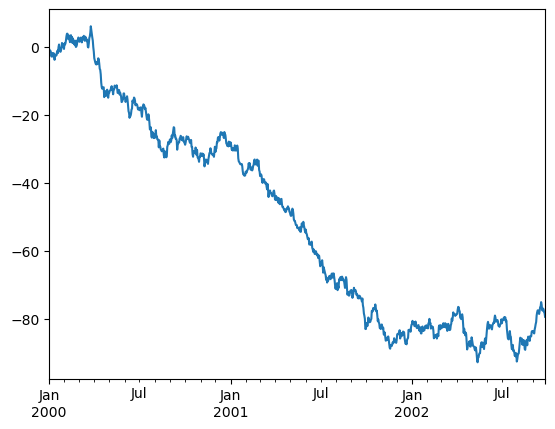

In [66]:
import matplotlib.pyplot as plt
plt.close("all")

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

If running under Jupyter Notebook, the plot will appear on [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas.Series.plot). Otherwise use [`matplotlib.pyplot.show`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) to show it or [`matplotlib.pyplot.savefig`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) to write it to a file.

On a DataFrame, the [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method is a convenience to plot all of the columns with labels:

<Figure size 640x480 with 0 Axes>

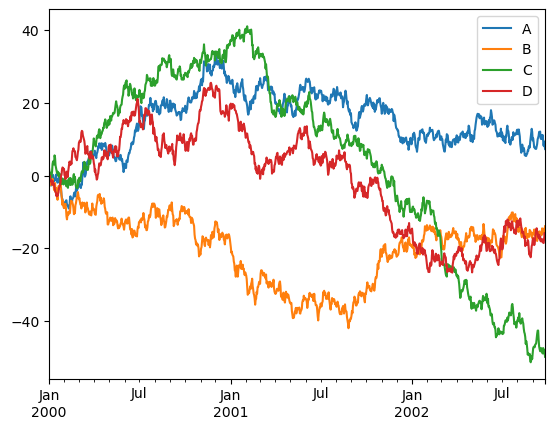

In [67]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

## Importing and exporting data

### CSV

[Writing to a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv): using [`DataFrame.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv)

In [68]:
df.to_csv("foo.csv")

[Reading from a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table): using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)

In [69]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.808455,-1.085713,1.935780,-0.388769
1,2000-01-02,0.001302,-1.544791,0.645094,0.102588
2,2000-01-03,-0.946166,-2.638064,0.849601,-1.168314
3,2000-01-04,-1.554608,-2.166456,-0.572909,-1.056675
4,2000-01-05,-2.716819,-0.431928,-0.573529,-1.603425
...,...,...,...,...,...
995,2002-09-22,9.688262,-14.827767,-47.460309,-18.442673
996,2002-09-23,8.254147,-14.597281,-48.907227,-18.531943
997,2002-09-24,9.413717,-15.626331,-47.923373,-17.436627
998,2002-09-25,8.405160,-15.298872,-48.672128,-15.780557


### Excel

Reading and writing to [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel).

Writing to an excel file using [`DataFrame.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel):

In [70]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel):

In [71]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.808455,-1.085713,1.935780,-0.388769
1,2000-01-02,0.001302,-1.544791,0.645094,0.102588
2,2000-01-03,-0.946166,-2.638064,0.849601,-1.168314
3,2000-01-04,-1.554608,-2.166456,-0.572909,-1.056675
4,2000-01-05,-2.716819,-0.431928,-0.573529,-1.603425
...,...,...,...,...,...
995,2002-09-22,9.688262,-14.827767,-47.460309,-18.442673
996,2002-09-23,8.254147,-14.597281,-48.907227,-18.531943
997,2002-09-24,9.413717,-15.626331,-47.923373,-17.436627
998,2002-09-25,8.405160,-15.298872,-48.672128,-15.780557
